In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np

In [53]:

df = pd.read_csv('rotor_blade.csv', sep = ',', header=None, )
df.columns=['x','y','z']
df2 = df.drop_duplicates()

In [54]:
def order(ordered_list, remaining_points):
    if len(ordered_list)==0:
        ordered_list.append(remaining_points[0])
        del remaining_points[0]
        return order(ordered_list, remaining_points)
    if len(remaining_points)!=0:
        point = ordered_list[-1]
        distance = []
        for i in remaining_points:
            dis = math.sqrt((i[0]-point[0])**2+(i[1]-point[1])**2)
            distance.append(dis)
        index = distance.index(min(distance))
        ordered_list.append(remaining_points[index])
        del remaining_points[index]

        return order(ordered_list, remaining_points)
    else:
        return ordered_list, remaining_points

In [55]:
ordered_list, remaining_points= order([],df2[['x','y','z']].values.tolist())
df_order = pd.DataFrame(ordered_list)
df_order.columns=['x','y','z']

In [56]:
df_order.to_csv('ordered_blade.txt',sep='\t', header=None, index=None)


In [57]:
df_order['xp'] = df_order['x'].shift(1)
df_order['yp'] = df_order['y'].shift(1)

df_order['distance']=df_order.apply(lambda x: np.sqrt((x['xp']-x['x'])**2+(x['yp']-x['y'])**2), axis=1)
df_order.fillna(1).sort_values('distance')

,x,y,z,xp,yp,distance
1,0.041904,0.393323,0.0,0.041750,0.393191,0.000203
3,0.042128,0.393664,0.0,0.042033,0.393485,0.000203
2,0.042033,0.393485,0.0,0.041904,0.393323,0.000207
9,0.041791,0.395607,0.0,0.041958,0.395454,0.000226
7,0.042092,0.395266,0.0,0.042181,0.395058,0.000226
8,0.041958,0.395454,0.0,0.042092,0.395266,0.000231
6,0.042181,0.395058,0.0,0.042302,0.394779,0.000304
100,-0.004969,0.308213,0.0,-0.005279,0.308234,0.000310
102,-0.004350,0.308273,0.0,-0.004657,0.308226,0.000310
101,-0.004657,0.308226,0.0,-0.004969,0.308213,0.000312


In [58]:
import numpy as np
df_order['index'] = df_order.index



In [104]:
df_order['tosmall'] = df_order['distance'].map(lambda x: True if x<0.0003 else False)
df_tmp = df_order[df_order['tosmall']].sort_values(['tosmall','index'])
df_tmp['drop'] =df_tmp['index'].map(lambda x: True if x%2==1 else False)
df_tmp

,x,y,z,xp,yp,distance,index,tosmall,drop
1,0.041904,0.393323,0.0,0.041750,0.393191,0.000203,1,True,True
2,0.042033,0.393485,0.0,0.041904,0.393323,0.000207,2,True,False
3,0.042128,0.393664,0.0,0.042033,0.393485,0.000203,3,True,True
7,0.042092,0.395266,0.0,0.042181,0.395058,0.000226,7,True,True
8,0.041958,0.395454,0.0,0.042092,0.395266,0.000231,8,True,False
9,0.041791,0.395607,0.0,0.041958,0.395454,0.000226,9,True,True


In [105]:
df_clean = df_order.join(df_tmp.set_index('index'),on='index', lsuffix='l', rsuffix='r')
df_clean


,xl,yl,zl,xpl,ypl,distancel,index,tosmalll,xr,yr,zr,xpr,ypr,distancer,tosmallr,drop
0,0.041750,0.393191,0.0,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.041904,0.393323,0.0,0.041750,0.393191,0.000203,1,True,0.041904,0.393323,0.0,0.041750,0.393191,0.000203,True,True
2,0.042033,0.393485,0.0,0.041904,0.393323,0.000207,2,True,0.042033,0.393485,0.0,0.041904,0.393323,0.000207,True,False
3,0.042128,0.393664,0.0,0.042033,0.393485,0.000203,3,True,0.042128,0.393664,0.0,0.042033,0.393485,0.000203,True,True
4,0.042342,0.394466,0.0,0.042128,0.393664,0.000829,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.042302,0.394779,0.0,0.042342,0.394466,0.000316,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.042181,0.395058,0.0,0.042302,0.394779,0.000304,6,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.042092,0.395266,0.0,0.042181,0.395058,0.000226,7,True,0.042092,0.395266,0.0,0.042181,0.395058,0.000226,True,True
8,0.041958,0.395454,0.0,0.042092,0.395266,0.000231,8,True,0.041958,0.395454,0.0,0.042092,0.395266,0.000231,True,False
9,0.041791,0.395607,0.0,0.041958,0.395454,0.000226,9,True,0.041791,0.395607,0.0,0.041958,0.395454,0.000226,True,True


In [111]:
df_clean['drop2']=df_clean['drop'].isna()
df_final = df_clean[df_clean['drop2']]
df_file= df_final[['xl','yl', 'zl', 'index']].sort_values('index')


df_file2 = df_file[['xl','yl', 'zl']]
df_file2.columns=['x','y','z']
df_file2.to_csv('clean_points.txt', index=False, sep=',', header=None)


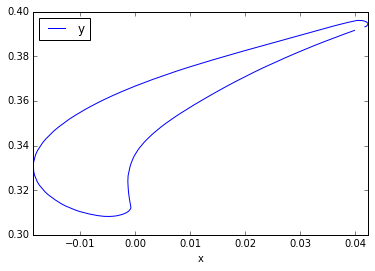

In [107]:
df.plot(x='x',y='y')

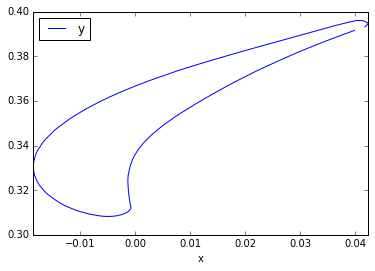

In [108]:
df_file2.plot(x='x',y='y')

In [109]:

df_file2.shape

(168, 3)

In [110]:
df.shape

(174, 3)